CREDIT RISK MODELS

In [11]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt


data = pandas.read_csv("UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
#checking for missing values

data.isna().sum()/ data.shape[0]

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

In [13]:
# encoding education variable

data['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
data.EDUCATION.value_counts()

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

In [14]:
# encoding marriage variable

data['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

In [15]:
data.PAY_0.value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

Text(0.5, 1.0, 'Istogramma')

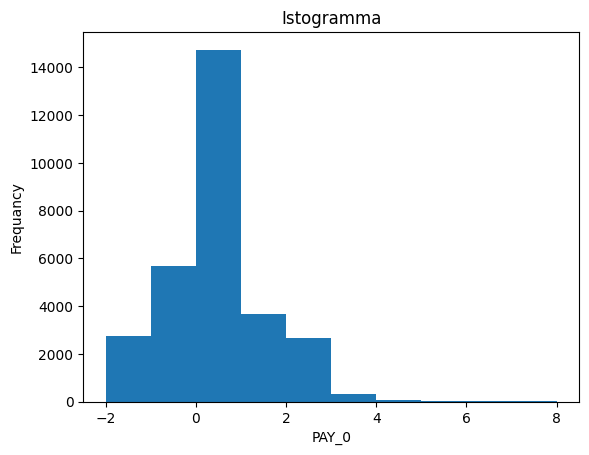

In [21]:
#DATA VISUALIZATION

plt.hist(data.PAY_0)

plt.xlabel('PAY_0')
plt.ylabel('Frequancy')
plt.title('Istogramma')

Text(0.5, 1.0, 'Hist')

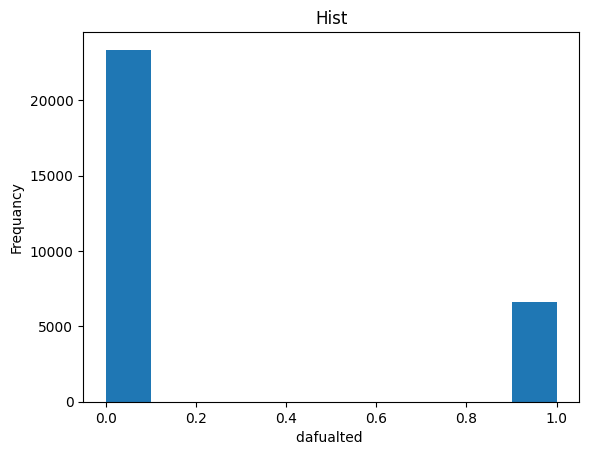

In [22]:
plt.hist(data["default.payment.next.month"])

plt.xlabel('dafualted ')
plt.ylabel('Frequancy')
plt.title('Hist')

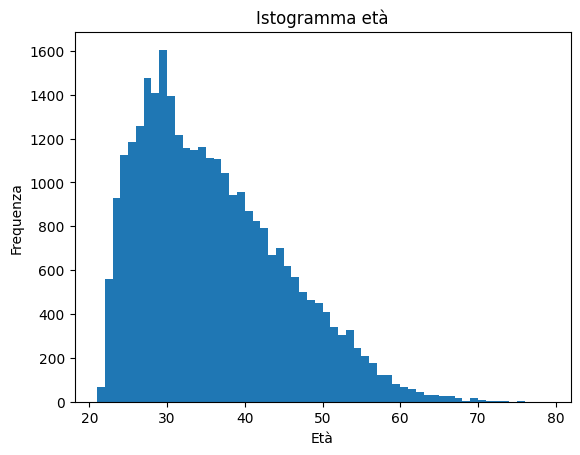

In [28]:
age_min = data['AGE'].min()
age_max = data['AGE'].max()
bin_width = 1
num_bins = int((age_max - age_min) / bin_width)

# Creazione dell'istogramma con barre larghe 5 anni
plt.hist(data['AGE'], bins=num_bins)

# Aggiunta di etichette e titolo
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age gistogram')

# Mostrare l'istogramma
plt.show()



START MODELLING


In [ ]:
# Independnet features
X = data.drop(['default.payment.next.month'], axis=1)
# Dependent feature
y = data['default.payment.next.month']
X.head()
y

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler= StandardScaler()
X= scaler.fit_transform(X)

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [34]:
#embalance the class


from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)
# Predicting the model
pred_logit= logit.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score



print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.6853333333333333
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.38      0.66      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000


RANDOM FOREST CLASSIFIER

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
# Predicting the model
pred_rf= rf.predict(X_test)

In [40]:
print("The accuracy of random forest model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy of logit model is: 0.7945
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.54      0.45      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000


XGBOOST

In [42]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

In [43]:
print("The accuracy of xgboost model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy of xgboost model is: 0.7945
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.54      0.45      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000


In [44]:
#hyper parameters

params={
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [45]:
# Finding the best estimators
random_search.best_estimator_
# Finding the best param
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [47]:
# Predicting model
y_pred= xgb_clf.predict(X_test)